In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [82]:
df=pd.read_csv('/home/ahad/Desktop/mobileprices.csv')

Checking the data

In [83]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [85]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Visualizing the data

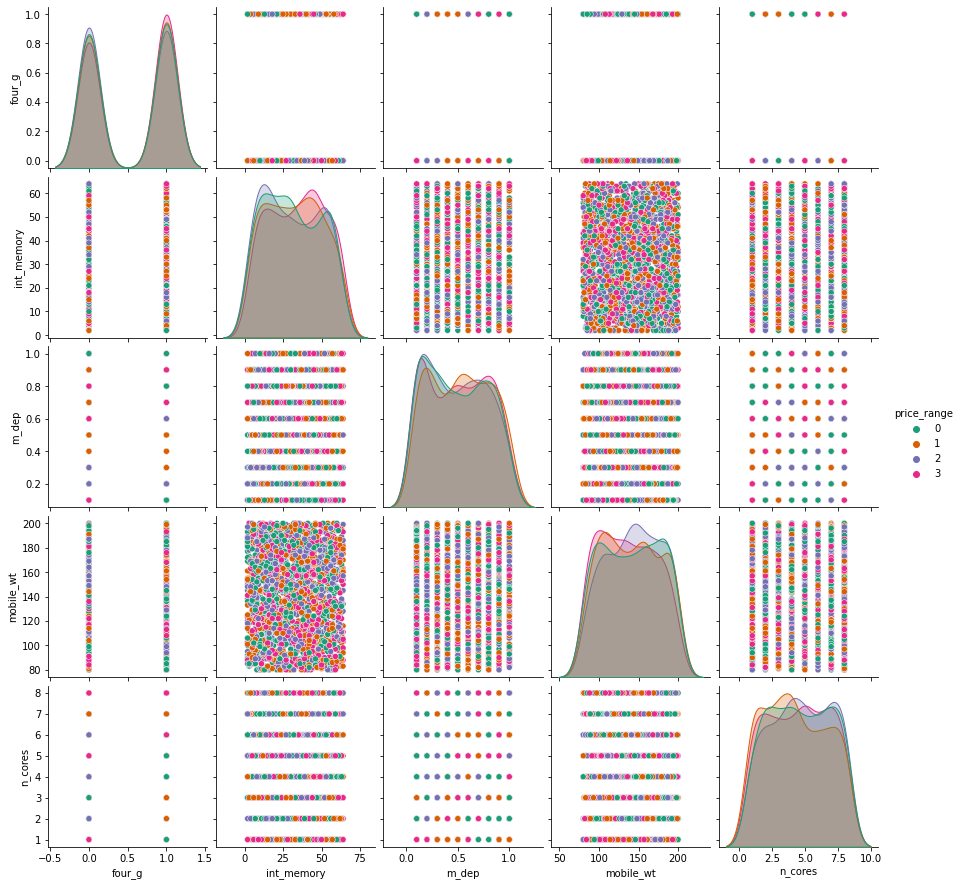

In [86]:
sns.pairplot(df, vars=['four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores'], hue='price_range', palette='Dark2')

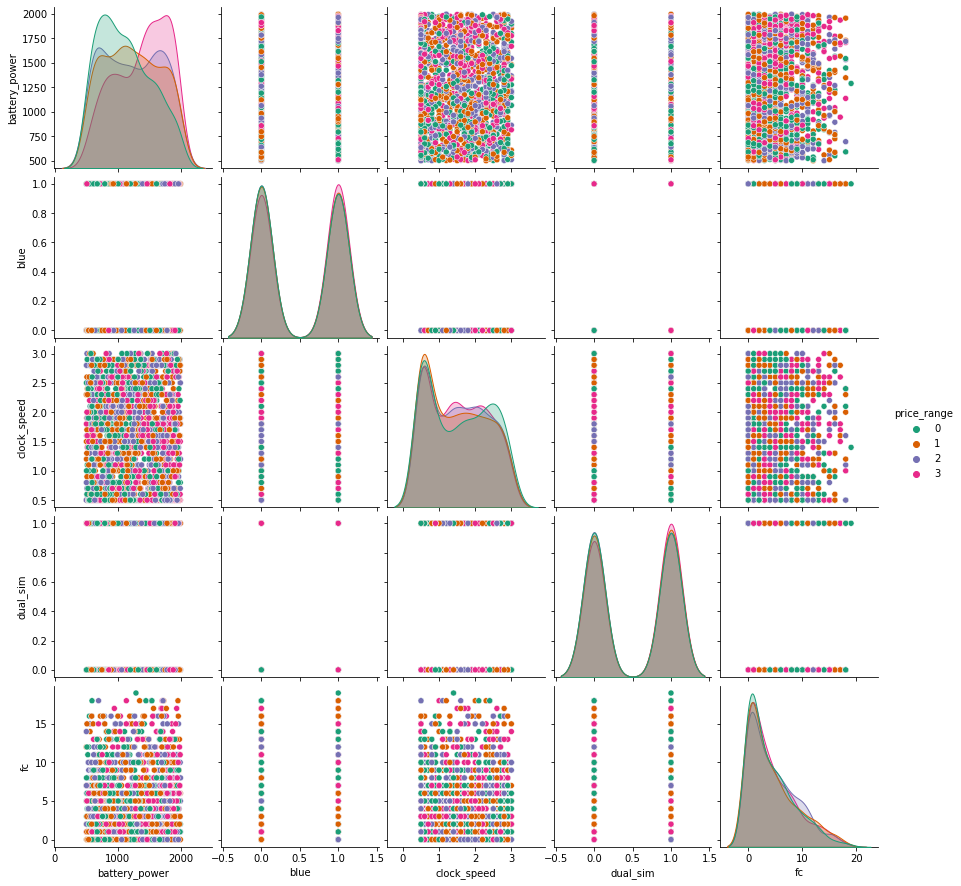

In [87]:
sns.pairplot(df, vars=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc'], hue='price_range', palette='Dark2')

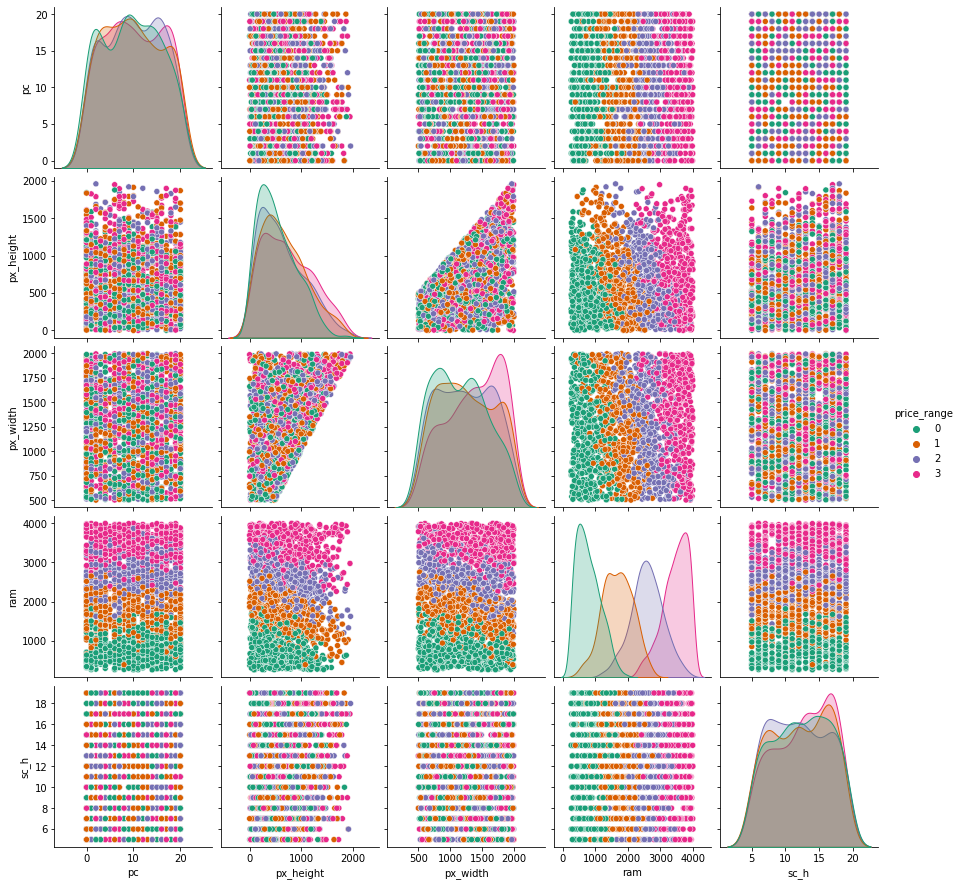

In [88]:
sns.pairplot(df, vars=['pc', 'px_height', 'px_width', 'ram', 'sc_h'], hue='price_range', palette='Dark2')

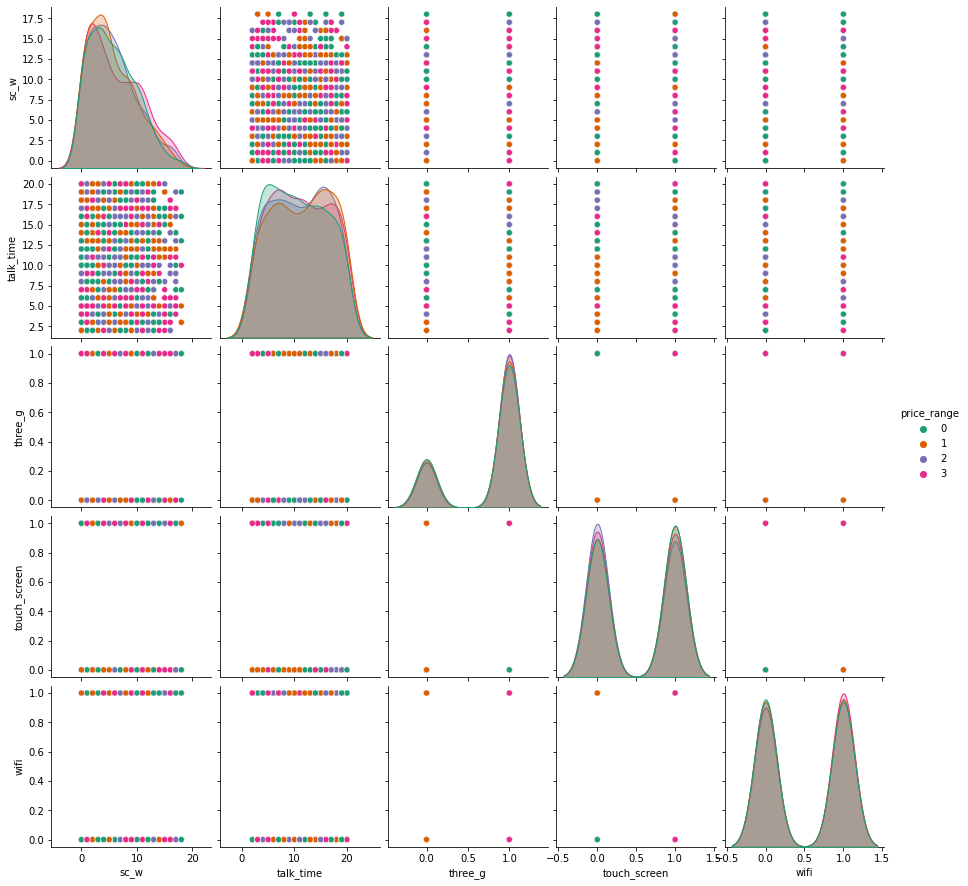

In [89]:
sns.pairplot(df, vars=['sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi'], hue='price_range', palette='Dark2')

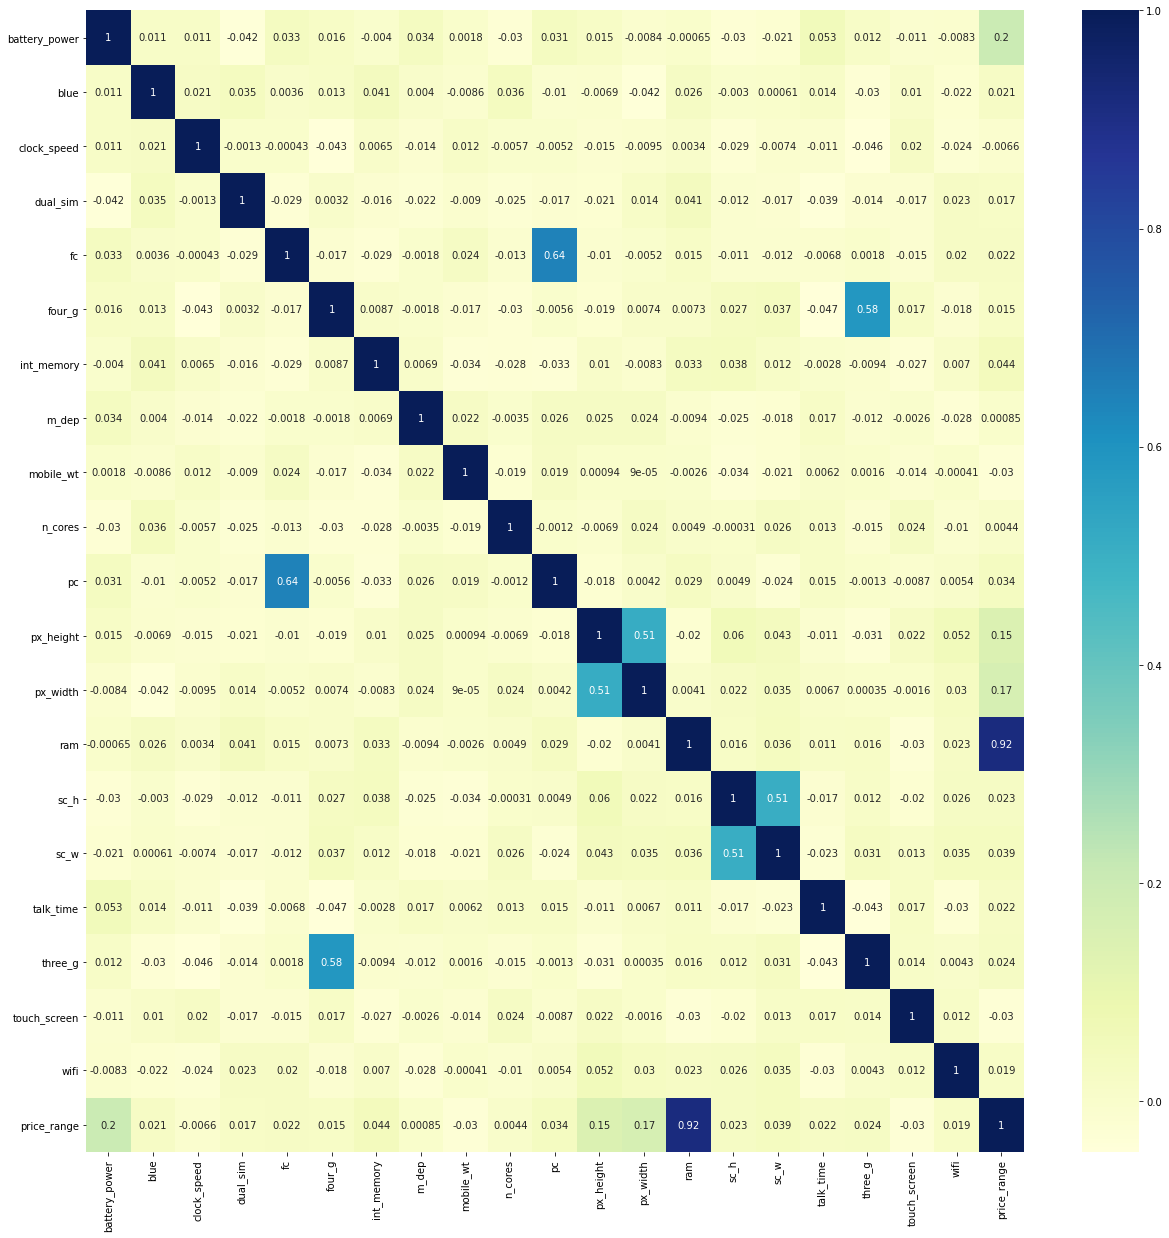

In [90]:
plt.figure(figsize = (21,21))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

<AxesSubplot:xlabel='price_range', ylabel='ram'>

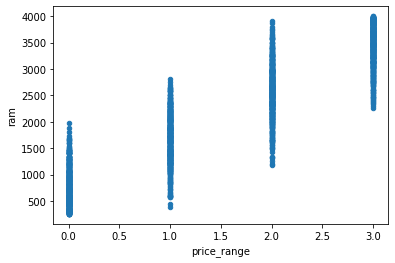

In [91]:
df.plot(x='price_range',y='ram',kind='scatter')

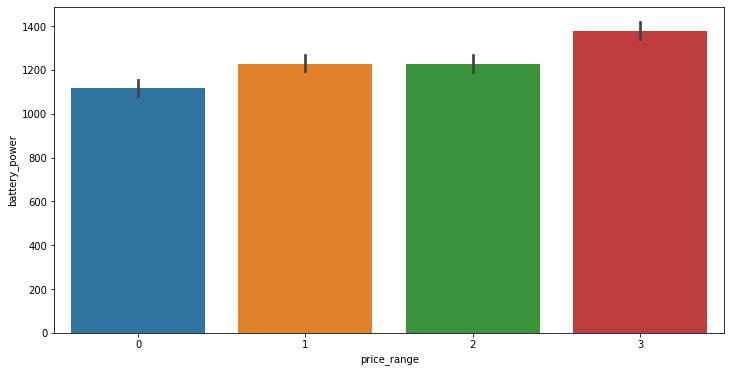

In [92]:
plt.figure(figsize=(12,6))
sns.barplot(x='price_range', y='battery_power',data=df)
plt.show()

Checking for null values

In [93]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Splitting the data

In [94]:
df_X = df.drop('price_range',axis=1)

In [95]:
df_X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [96]:
df_Y = df['price_range']

In [97]:
df_Y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [144]:
X_train,X_test,Y_train,Y_test=train_test_split(df_X,df_Y,test_size=0.35,random_state=None)

In [145]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
281,1429,0,1.5,1,0,1,40,0.9,100,3,14,246,820,3945,11,7,18,1,0,1
1169,763,1,0.5,0,9,1,51,0.3,104,5,12,273,1278,2865,11,6,9,1,1,1
1013,1694,0,1.8,0,0,0,53,1.0,186,6,0,1194,1208,1653,7,5,6,1,0,0
1109,1542,0,2.3,0,1,0,43,0.8,182,2,11,346,966,3601,14,4,16,0,0,0
1776,1072,1,2.2,1,6,0,19,0.4,114,8,16,380,877,2715,15,9,16,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978,1483,1,2.2,0,3,1,53,0.7,169,5,11,291,651,1744,6,3,10,1,0,0
28,1453,0,1.6,1,12,1,52,0.3,96,2,18,187,1311,2373,10,1,10,1,1,1
931,582,0,0.5,1,3,0,27,0.2,168,3,10,985,1420,2437,19,2,2,1,1,1
879,906,0,2.1,1,7,0,18,0.1,136,2,11,1102,1793,3412,13,8,16,1,0,0


In [146]:
X_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1519,1335,1,3.0,0,3,0,60,0.8,180,2,4,83,559,3615,5,2,9,1,0,0
1936,1035,1,2.7,0,1,0,40,0.2,157,5,15,757,1912,3548,14,4,5,0,1,1
1210,805,1,1.7,1,0,1,58,0.9,168,3,10,81,1544,3397,7,6,2,1,0,0
450,712,1,0.5,1,3,1,35,0.2,84,2,10,558,1208,2190,16,12,4,1,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,1230,1,1.6,0,0,1,48,0.7,111,7,2,1960,1963,1622,18,17,16,1,1,1
163,1193,0,0.9,0,11,0,26,0.5,166,1,20,730,1729,536,17,14,4,1,0,1
493,1902,0,2.8,1,6,0,50,0.8,124,8,9,1142,1393,343,11,8,18,0,1,0
114,1804,0,0.5,0,9,1,22,0.6,153,7,19,1158,1244,3472,9,1,20,1,0,1


In [147]:
Y_train

281     3
1169    2
1013    2
1109    3
1776    2
       ..
1978    1
28      2
931     2
879     3
862     2
Name: price_range, Length: 1300, dtype: int64

Scaling the data

In [148]:
scaler = StandardScaler()

In [149]:
Scaled_X_train = scaler.fit_transform(X_train)

In [150]:
Scaled_X_test = scaler.transform(X_test)

In [151]:
len(Scaled_X_train)

1300

In [152]:
len(Scaled_X_test)

700

In [153]:
Scaled_X_train

array([[ 0.4245037 , -1.        , -0.0047097 , ...,  0.54653573,
        -1.0061729 ,  0.98170577],
       [-1.10257303,  1.        , -1.2292327 , ...,  0.54653573,
         0.99386497,  0.98170577],
       [ 1.03212432, -1.        ,  0.36264719, ...,  0.54653573,
        -1.0061729 , -1.01863514],
       ...,
       [-1.51758938, -1.        , -1.2292327 , ...,  0.54653573,
         0.99386497,  0.98170577],
       [-0.77468719, -1.        ,  0.73000409, ...,  0.54653573,
        -1.0061729 , -1.01863514],
       [-0.41011482,  1.        , -1.2292327 , ...,  0.54653573,
        -1.0061729 ,  0.98170577]])

In [154]:
Scaled_X_test

array([[ 0.20897034,  1.        ,  1.83207478, ...,  0.54653573,
        -1.0061729 , -1.01863514],
       [-0.47890206,  1.        ,  1.46471789, ..., -1.82970656,
         0.99386497,  0.98170577],
       [-1.0062709 ,  1.        ,  0.24019489, ...,  0.54653573,
        -1.0061729 , -1.01863514],
       ...,
       [ 1.50904918, -1.        ,  1.58717019, ..., -1.82970656,
         0.99386497, -1.01863514],
       [ 1.2843442 , -1.        , -1.2292327 , ...,  0.54653573,
        -1.0061729 ,  0.98170577],
       [-1.25390496, -1.        ,  1.46471789, ...,  0.54653573,
         0.99386497,  0.98170577]])

Decision Trees

In [155]:
dt=DecisionTreeClassifier()

In [156]:
dt.fit(Scaled_X_train,Y_train)

DecisionTreeClassifier()

In [157]:
Y_predict=dt.predict(Scaled_X_test)

In [158]:
DTacc=accuracy_score(Y_test,Y_predict)

In [159]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       188
           1       0.74      0.76      0.75       169
           2       0.76      0.69      0.73       172
           3       0.83      0.91      0.87       171

    accuracy                           0.81       700
   macro avg       0.81      0.81      0.81       700
weighted avg       0.81      0.81      0.81       700



In [160]:
print(confusion_matrix(Y_test,Y_predict))

[[164  24   0   0]
 [ 19 129  21   0]
 [  0  21 119  32]
 [  0   0  16 155]]


Logisitic Regression

In [161]:
LRAlgo=LogisticRegression()

In [162]:
LRAlgo.fit(Scaled_X_train,Y_train)

LogisticRegression()

In [163]:
LRAlgo_Y_predict=LRAlgo.predict(Scaled_X_test)

In [164]:
LRacc=accuracy_score(Y_test,LRAlgo_Y_predict)

In [165]:
print(classification_report(Y_test,LRAlgo_Y_predict))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       188
           1       0.92      0.96      0.94       169
           2       0.95      0.89      0.92       172
           3       0.93      0.97      0.95       171

    accuracy                           0.95       700
   macro avg       0.95      0.95      0.95       700
weighted avg       0.95      0.95      0.95       700



In [166]:
print(confusion_matrix(Y_test,LRAlgo_Y_predict))

[[180   8   0   0]
 [  3 163   3   0]
 [  0   6 153  13]
 [  0   0   5 166]]


XGBoost

In [167]:
model = XGBClassifier()

In [168]:
model.fit(Scaled_X_train, Y_train)

/home/ahad/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:00:28] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [169]:
Y_predictions = model.predict(Scaled_X_test)

In [170]:
XGBoostacc=accuracy_score(Y_test, Y_predictions)

In [171]:
print(XGBoostacc)

0.9014285714285715


Support Vector Machine (SVM)

In [172]:
SVMclassifier = SVC(kernel='linear')

In [173]:
SVMclassifier.fit(Scaled_X_train, Y_train)

SVC(kernel='linear')

In [174]:
SVM_predictions = SVMclassifier.predict(Scaled_X_test)

In [175]:
SVMacc = accuracy_score(Y_test, SVM_predictions)

In [176]:
print(confusion_matrix(Y_test,SVM_predictions))
print(classification_report(Y_test,SVM_predictions))

[[179   9   0   0]
 [  4 161   4   0]
 [  0   5 152  15]
 [  0   0   5 166]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       188
           1       0.92      0.95      0.94       169
           2       0.94      0.88      0.91       172
           3       0.92      0.97      0.94       171

    accuracy                           0.94       700
   macro avg       0.94      0.94      0.94       700
weighted avg       0.94      0.94      0.94       700



K-Nearest-Neighbors

In [211]:
KNNclassifier = KNeighborsClassifier(n_neighbors=618)
KNNclassifier.fit(Scaled_X_train, Y_train)

KNeighborsClassifier(n_neighbors=618)

In [212]:
KNNClassifier_predictions = KNNclassifier.predict(Scaled_X_test)

In [213]:
KNNacc = accuracy_score(Y_test,KNNClassifier_predictions)

In [214]:
print(confusion_matrix(Y_test, KNNClassifier_predictions))
print(classification_report(Y_test, KNNClassifier_predictions))

[[144  43   1   0]
 [ 19 110  39   1]
 [  0  37 111  24]
 [  0   1  52 118]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       188
           1       0.58      0.65      0.61       169
           2       0.55      0.65      0.59       172
           3       0.83      0.69      0.75       171

    accuracy                           0.69       700
   macro avg       0.71      0.69      0.69       700
weighted avg       0.71      0.69      0.70       700



In [215]:
error = []
# Calculating error for K values between 1 and 300
for i in range(1, 620):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Scaled_X_train, Y_train)
    pred_i = knn.predict(Scaled_X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Mean Error')

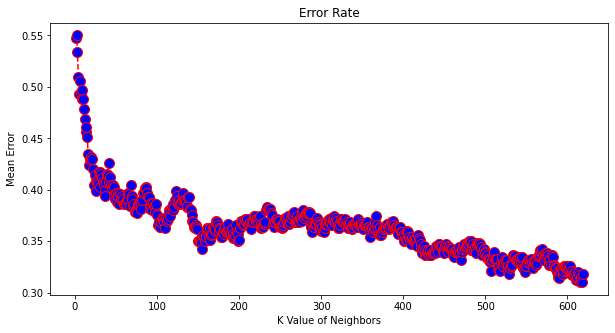

In [216]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 620), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate')
plt.xlabel('K Value of Neighbors')
plt.ylabel('Mean Error')

Classifier Comparisons

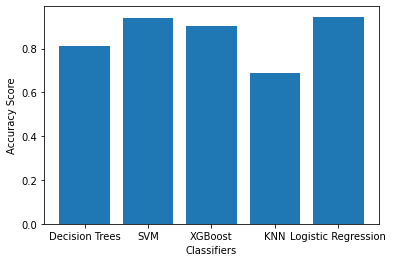

In [218]:
plt.bar(x=['Decision Trees','SVM',
          'XGBoost', 'KNN', 'Logistic Regression'],height=[DTacc,SVMacc,XGBoostacc,KNNacc,LRacc])
plt.xlabel("Classifiers")
plt.ylabel("Accuracy Score")
plt.show()